In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y)
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
    plt.xticks([]), plt.yticks([])
    plt.title(title)

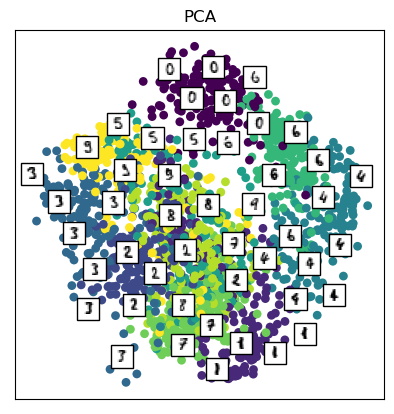

In [2]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.savefig('PCA.jpg')
plt.show()

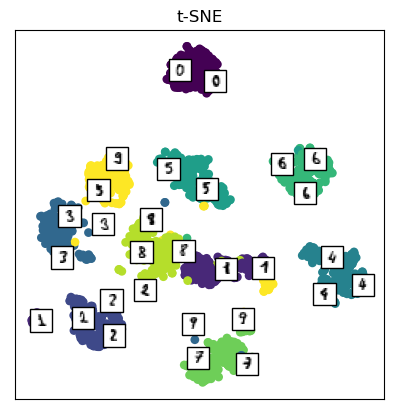

In [3]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
plt.savefig('TSNE.jpg')
plt.show()